# Coréia do Sul e sua população em declínio

A Coréia do Sul é um país muito conhecido pelo desenvolvimento tecnológico e pela sua cultura, com destaque ao K-Pop e as novelas coreana chamas popularmente de Doramas.

A população coreana mais que dobrou na segunda metade do século 20. O número de nascimentos, entretanto, passou a diminuir significativamente com o passar dos anos. Além da taxa de natalidade estar em decadência, o número de mortes aumentou.
Quando existem mais mortes do que nascimentos, um alerta deve ser emitido e isso sinaliza que algo de muito errado pode estar acontecendo.

O fato chamou a atenção do mundo e o problema está preocupando as autoridades coreanas. 

*O que é que está acontecendo por lá?*

**Este projeto irá analisar os dados referentes a taxa de natalidade e mortalidade da Coréia do Sul e ver quais insights podem ser extraídos com eles.**

## Obtenção dos Dados

Os dados utilizados nesta análise foram retirados do [Kosis]('https://kosis.kr/eng/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ETITLE&parmTabId=M_01_01&statId=1962004&themaId=#A_3.2'), o serviço de informação estatística coreano.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

- `Vital_Statistics_of_Korea.csv`- Encontrado na categoria Population -> Vital Statistics(Live Birth,Death,Marriage,Divorce) -> Vital Statistics of Korea.

In [1]:
#instalando bibliotecas que serão necessárias para o projeto
!pip install plotly

In [2]:
#Importando os pacotes necessários
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns


%matplotlib inline

## Dicionário de Variáveis

Esse arquivo csv possui 16 colunas. São elas:

- Live births(persons)
     - O número de nascimento
     
     
- Deaths(persons)
    - O número de mortes
    
    
- Natural increase(persons)	
    - O crescimento vegetativo (ou crescimento natural): diferença entre o número de nascimentos e o número de mortes
    
    
- Crude birth rate(per 1,000 population)
    - A taxa de natalidade
    
    
- Crude death rate(per 1,000 population)
    - A taxa de mortalidade
    
    
- Natural increase rate(per 1,000 population)
    - A taxa de crescimento natural
    
    
- Total fertility rate(persons)
    - A Taxa de fecundidade: a média de filhos de uma mulher em todo o seu período reprodutivo
    
    
- Masculinity of birth(persons)	 
    - Razão de masculinidade nos nascimentos: o número de homens para 100 mulheres
    
    
- Infant mortality rate(per 1,000 live births)
    - Taxa de mortalidade infantil
    
    
- Marriages(cases)	 
    - Número de casamentos
    
    
- Crude marriage rate(per 1,000 population)	
    - Taxa de casamento
    
    
- Divorces(cases)
    - Número de divórcios
    
    
- Crude divorce rate(per 1,000 population)	
    - Taxa de divórcio
    
    
- Life expectancy at birth-total(age)
    - Expectativa de vida total
    
    
- Life expectancy at birth-male(age)
    - Expectativa de vida dos homens
    
    
- Life expectancy at birth-female(age)
    - Expectativa de vida das mulheres
    
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
#Lendo o dataset e exibindo as 5 primeiras linhas
df = pd.read_csv('Vital_Statistics_of_Korea.csv')
df.head()

,Period,Live births(persons),Deaths(persons),Natural increase(persons),Crude birth rate(per 1000 population),Crude death rate(per 1000 population),Natural increase rate(per 1000 population),Total fertility rate(persons),Masculinity of birth(persons),Infant mortality rate(per 1000 live births),Marriages(cases),Crude marriage rate(per 1000 population),Divorces(cases),Crude divorce rate(per 1000 population),Life expectancy at birth-total(age),Life expectancy at birth-male(age),Life expectancy at birth-female(age)
0,1970,1006645,258589,748056,31.2,8.0,23.2,4.53,109.5,-,295137,9.2,11615,0.4,62.3,58.7,65.8
1,1971,1024773,237528,787245,31.2,7.2,23.9,4.54,109.0,-,239457,7.3,11361,0.3,62.7,59.1,66.3
2,1972,952780,210071,742709,28.4,6.3,22.2,4.12,109.5,-,244780,7.3,12188,0.4,63.1,59.4,66.8
3,1973,965521,267460,698061,28.3,7.8,20.5,4.07,104.6,-,259112,7.6,12719,0.4,63.5,59.7,67.3
4,1974,922823,248807,674016,26.6,7.2,19.4,3.77,109.4,-,259604,7.5,14073,0.4,63.9,60.0,67.8


In [4]:
#Exibindo as 5 últimas linhas
df.tail()

,Period,Live births(persons),Deaths(persons),Natural increase(persons),Crude birth rate(per 1000 population),Crude death rate(per 1000 population),Natural increase rate(per 1000 population),Total fertility rate(persons),Masculinity of birth(persons),Infant mortality rate(per 1000 live births),Marriages(cases),Crude marriage rate(per 1000 population),Divorces(cases),Crude divorce rate(per 1000 population),Life expectancy at birth-total(age),Life expectancy at birth-male(age),Life expectancy at birth-female(age)
46,2016,406243,280827,125416,7.9,5.5,2.5,1.172,105.0,2.8,281635,5.5,107328,2.1,82.4,79.3,85.4
47,2017,357771,285534,72237,7.0,5.6,1.4,1.052,106.3,2.8,264455,5.2,106032,2.1,82.7,79.7,85.7
48,2018,326822,298820,28002,6.4,5.8,0.5,0.977,105.4,2.8,257622,5.0,108684,2.1,82.7,79.7,85.7
49,2019,302676,295110,7566,5.9,5.7,0.1,0.918,105.5,2.7,239159,4.7,110831,2.2,83.3,80.3,86.3
50,2020 p),272400,305100,-32700,5.3,5.9,-0.6,0.840,104.9,-,213502,4.2,106500,2.1,-,-,-


## Primeiros passos no dataframe 

Antes de prosseguir, algumas colunas não apresentam informações relevantes para esta análise, portanto *Masculinity of birth(persons)*, *Infant mortality rate(per 1000 live births)*, *Crude marriage rate(per 1000 population)*, *Crude marriage rate(per 1000 population)*, *Crude divorce rate(per 1000 population)*, *Life expectancy at birth-total(age)*, *Life expectancy at birth-male(age)* e *Life expectancy at birth-female(age)* serão removidas do dataset. Após removê-las, os indexes serão renomeados de forma que siga um padrão e, para isso, a função `.rename` será utilizada. Aproveitaremos também para corrigir o ano 2020 que apresenta caracteres desnecessários.

In [5]:
#excluindo as colunas que não serão utilizadas
df.drop(['Masculinity of birth(persons)', 'Infant mortality rate(per 1000 live births)', 
                 'Crude marriage rate(per 1000 population)','Crude divorce rate(per 1000 population)', 'Life expectancy at birth-male(age)', 'Life expectancy at birth-female(age)'], axis=1, inplace=True)
df.head()

,Period,Live births(persons),Deaths(persons),Natural increase(persons),Crude birth rate(per 1000 population),Crude death rate(per 1000 population),Natural increase rate(per 1000 population),Total fertility rate(persons),Marriages(cases),Divorces(cases),Life expectancy at birth-total(age)
0,1970,1006645,258589,748056,31.2,8.0,23.2,4.53,295137,11615,62.3
1,1971,1024773,237528,787245,31.2,7.2,23.9,4.54,239457,11361,62.7
2,1972,952780,210071,742709,28.4,6.3,22.2,4.12,244780,12188,63.1
3,1973,965521,267460,698061,28.3,7.8,20.5,4.07,259112,12719,63.5
4,1974,922823,248807,674016,26.6,7.2,19.4,3.77,259604,14073,63.9


In [6]:
#Renomeando as colunas
df.rename({'Period': 'year','Live births(persons)':'live_birth', 'Deaths(persons)': 'death',
                 'Natural increase(persons)': 'natural_increase', 'Crude birth rate(per 1000 population)':'birth_rate','Crude death rate(per 1000 population)':'death_rate', 'Natural increase rate(per 1000 population)': 'natural_increase_rate', 'Total fertility rate(persons)': 'fertility_rate', 'Marriages(cases)': 'marriages', 'Divorces(cases)': 'divorces', 'Life expectancy at birth-total(age)': 'life_expectancy'}, axis = 1, inplace = True)
df.head()

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
0,1970,1006645,258589,748056,31.2,8.0,23.2,4.53,295137,11615,62.3
1,1971,1024773,237528,787245,31.2,7.2,23.9,4.54,239457,11361,62.7
2,1972,952780,210071,742709,28.4,6.3,22.2,4.12,244780,12188,63.1
3,1973,965521,267460,698061,28.3,7.8,20.5,4.07,259112,12719,63.5
4,1974,922823,248807,674016,26.6,7.2,19.4,3.77,259604,14073,63.9


In [7]:
#substituindo o ano de 2020
df = df.apply(lambda x: x.replace('2020 p)', '2020'))
df.tail()

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
46,2016,406243,280827,125416,7.9,5.5,2.5,1.172,281635,107328,82.4
47,2017,357771,285534,72237,7.0,5.6,1.4,1.052,264455,106032,82.7
48,2018,326822,298820,28002,6.4,5.8,0.5,0.977,257622,108684,82.7
49,2019,302676,295110,7566,5.9,5.7,0.1,0.918,239159,110831,83.3
50,2020,272400,305100,-32700,5.3,5.9,-0.6,0.840,213502,106500,-


### Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [8]:
# identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificando os tipos de variáveis do dataset
display(df.dtypes)

Entradas:	 51
Variáveis:	 11



year                      object
live_birth                 int64
death                      int64
natural_increase           int64
birth_rate               float64
death_rate               float64
natural_increase_rate    float64
fertility_rate           float64
marriages                  int64
divorces                   int64
life_expectancy           object
dtype: object

Com o comando `df.dtypes` conseguimos identificar o tipo de dado registrado nas colunas do dataset. Dessa forma, podemos perceber que a coluna `life_expectancy` possui o tipo object, ou seja, seus valores estão em formato de texto. Pela experiência e familiaridade com o dataset, posso adiantar que isso se dá devido a algumas entradas apresentarem traços `-` em seus campos. Vamos conferir?

In [9]:
#Verificando se a coluna life_expectancy contém traços (-)
df[df['life_expectancy'].str.contains("-")]

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
50,2020,272400,305100,-32700,5.3,5.9,-0.6,0.84,213502,106500,-


Agora que confirmamos a ocorrência do traço numa coluna que deveria possuir valores decimais, podemos corrigir a entrada. Neste caso, irei substituir pelo valor do ano antesrior da coluna `life_expectancy`, que é *86.3*.

In [10]:
#convertendo o traço por 86.3
df = df.apply(lambda x: x.replace('-', '86.3'))
df.tail()

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
46,2016,406243,280827,125416,7.9,5.5,2.5,1.172,281635,107328,82.4
47,2017,357771,285534,72237,7.0,5.6,1.4,1.052,264455,106032,82.7
48,2018,326822,298820,28002,6.4,5.8,0.5,0.977,257622,108684,82.7
49,2019,302676,295110,7566,5.9,5.7,0.1,0.918,239159,110831,83.3
50,2020,272400,305100,-32700,5.3,5.9,-0.6,0.840,213502,106500,86.3


Agora convertemos a coluna `life_expectancy` para float e podemos prosseguir.

In [11]:
#convertendo os valores de 'life_expectancy' para decimais
df['life_expectancy'] = df['life_expectancy'].astype('float64')

display(df.dtypes)

year                      object
live_birth                 int64
death                      int64
natural_increase           int64
birth_rate               float64
death_rate               float64
natural_increase_rate    float64
fertility_rate           float64
marriages                  int64
divorces                   int64
life_expectancy          float64
dtype: object

Antes de prosseguir, vamos conferir outra coisa importante: **a presença de valores nulos**!

In [12]:
#exibindo os valores ausentes cara cada coluna (as colunas com maior número de valores ausentes ficam localizalas no topo da lista)
(df.isnull().sum()).sort_values(ascending=False)

year                     0
live_birth               0
death                    0
natural_increase         0
birth_rate               0
death_rate               0
natural_increase_rate    0
fertility_rate           0
marriages                0
divorces                 0
life_expectancy          0
dtype: int64

### Q2. Qual o tipo de distribuição das variáveis?
Para identificar a distribuição das variáveis, irei plotar um histograma.

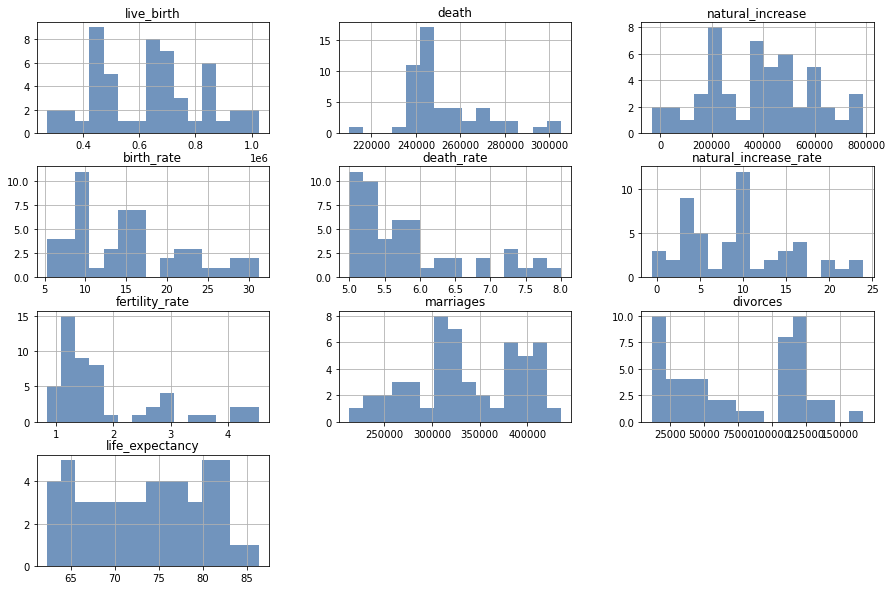

In [13]:
# plotando o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10), color='#7194BD');

### Q3. Há outliers presentes?

Pela distribuição do histograma, é possível verificar se há indícios da presença de *outliers*. Quando os valores não seguem uma distruição, eles distorcem toda a representação gráfica. Aparentemente, não possuímos nenhum outlier no dataset. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para as variávis suspeitas.

In [14]:
# ver o resumo estatístico das variáveis numéricas
df[['live_birth', 'death', 'natural_increase', 'birth_rate', 'death_rate', 'natural_increase_rate', 'fertility_rate', 'marriages', 'divorces', 'life_expectancy']].describe()

,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.359171e+05,252654.803922,383262.333333,15.280392,5.813725,9.462745,1.880980,337232.784314,74310.647059,73.482353
std,1.931523e+05,18220.750102,202526.746310,6.824808,0.826322,6.155712,0.980884,57762.431966,46541.419154,6.741771
min,2.724000e+05,210071.000000,-32700.000000,5.300000,5.000000,-0.600000,0.840000,213502.000000,11361.000000,62.300000
25%,4.707180e+05,241943.000000,216047.500000,9.400000,5.200000,4.300000,1.198500,302665.500000,27336.500000,67.450000
50%,6.400890e+05,246463.000000,397313.000000,15.000000,5.600000,9.500000,1.550000,329087.000000,68279.000000,73.800000
75%,7.599415e+05,262423.000000,506511.000000,19.800000,6.150000,13.200000,2.225000,390252.500000,115902.000000,79.400000
max,1.024773e+06,305100.000000,787245.000000,31.200000,8.000000,23.900000,4.540000,434911.000000,166617.000000,86.300000


Analisando os valores da tabela, o que mais me chama a atenção é a coluna `fertility_rate`:
- Apesar de sua média ser *1.880980* e seu mínimo ser *0.84*, o valor máximo exibido é de *4.54*, muito acima do padrão, pois podemos ver que 75% de seus valores estão abaixo de *2.225*. 
- A presença de *outliers* também foram identificados em `death` e `death_rate`.

Vamos observar mais a fundo sobre como eles estão se comportando e a qual ano pertencem.

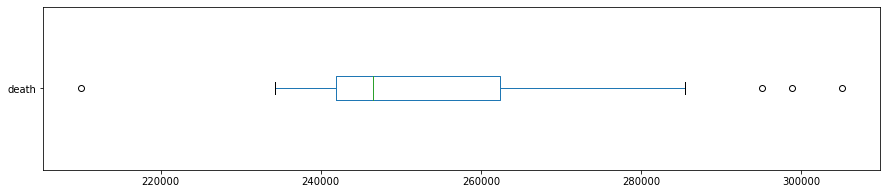

In [15]:
# plotando o gráfico de caixa para identificar os outliers
df.death.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [16]:
df.loc[df['death'] < 220000]

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
2,1972,952780,210071,742709,28.4,6.3,22.2,4.12,244780,12188,63.1


In [17]:
df.loc[df['death'] > 290000]

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
48,2018,326822,298820,28002,6.4,5.8,0.5,0.977,257622,108684,82.7
49,2019,302676,295110,7566,5.9,5.7,0.1,0.918,239159,110831,83.3
50,2020,272400,305100,-32700,5.3,5.9,-0.6,0.840,213502,106500,86.3


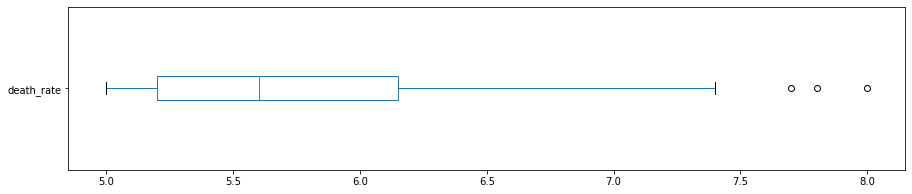

In [18]:
df.death_rate.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [19]:
df.loc[df['death_rate'] > 7.5]

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
0,1970,1006645,258589,748056,31.2,8.0,23.2,4.53,295137,11615,62.3
3,1973,965521,267460,698061,28.3,7.8,20.5,4.07,259112,12719,63.5
5,1975,874030,270657,603373,24.8,7.7,17.1,3.43,283226,16453,64.2


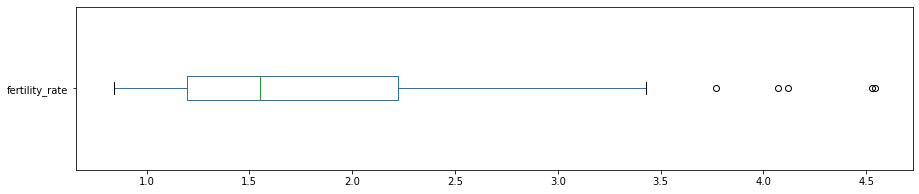

In [20]:
df.fertility_rate.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [21]:
df.loc[df['fertility_rate'] > 3.5]

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
0,1970,1006645,258589,748056,31.2,8.0,23.2,4.53,295137,11615,62.3
1,1971,1024773,237528,787245,31.2,7.2,23.9,4.54,239457,11361,62.7
2,1972,952780,210071,742709,28.4,6.3,22.2,4.12,244780,12188,63.1
3,1973,965521,267460,698061,28.3,7.8,20.5,4.07,259112,12719,63.5
4,1974,922823,248807,674016,26.6,7.2,19.4,3.77,259604,14073,63.9


#### Encontramos outliers, e agora?

Geralmente, os *outliers* atrapalham gravemente uma análise de dados, entretando, existem casos em que eles são exatamente o que estamos procurando. **Este é um deles**.

As variáveis que apresentaram irregularidades foram:
- death

- death_rate

- fertility_rate

Os casos de death_rate e feitility_rate não parecem ser problemáticos. Eles estão relacionados a década de 70 e este projeto levará em conta os últimos 20 anos. Agora, a discrepânciado último dos casos estão *completamente relacionados* com o motivo desta análise: **o alto número de mortes na Coréia do Sul**. Os números entre 2018 e 2020 estão muito acima do padrão que se esperava. Vamos destacar há uma diferença de quase 10,000 mil mortes de 2019 para 2020, sendo este último o ano no qual uma pandemia se alastrou pelo mundo. 

<span style="background-color: #FF5C5C">**Mas seria somente este o motivo de tais números?**</span>

Vamos prosseguir com a nossa análise.

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas ou mais coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [22]:
#calculando a correlação entre as variáveis
corr = df[['live_birth', 'death', 'natural_increase', 'birth_rate', 
           'death_rate', 'natural_increase_rate', 'fertility_rate',
           'marriages', 'divorces', 'life_expectancy']].corr()

display(corr)

,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
live_birth,1.000000,-0.479812,0.996880,0.980349,0.730935,0.988028,0.899088,0.214586,-0.844485,-0.952563
death,-0.479812,1.000000,-0.547569,-0.383248,0.158579,-0.446709,-0.220331,-0.533076,0.255382,0.473297
natural_increase,0.996880,-0.547569,1.000000,0.969451,0.682835,0.982484,0.877294,0.252613,-0.828372,-0.951052
birth_rate,0.980349,-0.383248,0.969451,1.000000,0.826223,0.997094,0.961668,0.053084,-0.868444,-0.956925
death_rate,0.730935,0.158579,0.682835,0.826223,1.000000,0.781214,0.879363,-0.264486,-0.799719,-0.775274
natural_increase_rate,0.988028,-0.446709,0.982484,0.997094,0.781214,1.000000,0.947785,0.094405,-0.854523,-0.956233
fertility_rate,0.899088,-0.220331,0.877294,0.961668,0.879363,0.947785,1.000000,-0.201355,-0.792725,-0.867853
marriages,0.214586,-0.533076,0.252613,0.053084,-0.264486,0.094405,-0.201355,1.000000,-0.205209,-0.206598
divorces,-0.844485,0.255382,-0.828372,-0.868444,-0.799719,-0.854523,-0.792725,-0.205209,1.000000,0.893019
life_expectancy,-0.952563,0.473297,-0.951052,-0.956925,-0.775274,-0.956233,-0.867853,-0.206598,0.893019,1.000000


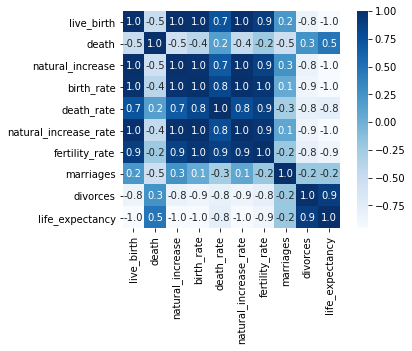

In [23]:
#Exibindo o mapa de calor das correlações
sns.heatmap(corr, cmap='Blues', fmt='.1f', square=True, linecolor='white', annot=True);

Era esperado que muitas das variáveis apresentassem certo grau de correlação, como 'live_birth' e 'natural_increase'. O que me chama atenção nesse mapa é a relação entre `'life_expectancy'` e `'divorces'`.

Por ora, vamos deixar essa observação anotada e prossigamos com a análise.

### Comparando os Dados

Vamos analisar o que os dados nos mostram um pouco mais a fundo e exibir as mudanças que ocorreram neles nos últimos 20 anos.
Para facilitar, será criado um novo dataset com o intervalo de tempo de precisamos.

In [24]:
#criando um novo dataset usando um slice no antigo
years = df[30:]
years.head()

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
30,2000,640089,248740,391349,13.5,5.2,8.2,1.480,332090,119455,76.0
31,2001,559934,243813,316121,11.7,5.1,6.6,1.309,318407,134608,76.5
32,2002,496911,247524,249387,10.3,5.1,5.2,1.178,304877,144910,76.8
33,2003,495036,246463,248573,10.2,5.1,5.1,1.191,302503,166617,77.3
34,2004,476958,246220,230738,9.8,5.1,4.8,1.164,308598,138932,77.8


In [25]:
#desta vez iremos usar a coluna 'year' como index
years = years.set_index(years['year'])
years.head()

,year,live_birth,death,natural_increase,birth_rate,death_rate,natural_increase_rate,fertility_rate,marriages,divorces,life_expectancy
year,,,,,,,,,,,
2000,2000,640089,248740,391349,13.5,5.2,8.2,1.480,332090,119455,76.0
2001,2001,559934,243813,316121,11.7,5.1,6.6,1.309,318407,134608,76.5
2002,2002,496911,247524,249387,10.3,5.1,5.2,1.178,304877,144910,76.8
2003,2003,495036,246463,248573,10.2,5.1,5.1,1.191,302503,166617,77.3
2004,2004,476958,246220,230738,9.8,5.1,4.8,1.164,308598,138932,77.8


### Mortalidade e Natalidade

Vamos plotar alguns gráficos para entendermos de forma mais clara a relação entre as variáveis desta análise, começando pelo número de nascimentos e mortes.

In [ ]:
#plotando o gráfico de comparação entre mortes e nascimentos
fig1 = make_subplots(rows=1, cols=1)

fig1.add_trace(go.Scatter(x=years.index, y=list(years['death']),
                                    fill='tozeroy', line=dict(color='#F59493', width=3),
                                    showlegend=True, name='Mortes'), row=1, col=1)
fig1.add_trace(go.Scatter(x=years.index, y=list(years['live_birth'])
                                    , line=dict(color='#7194BD', width=3),
                                    showlegend=True, name='Nascimentos'), row=1, col=1)

fig1.update_layout(title=dict(text="Mortes x Nascimentos", x=0.5, font_size=24, pad=dict(b=60)),
                  width=1000, height=450, plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

<img src="https://github.com/cristiana-e/Korea_Death_Birth/blob/master/graphs/fig1.png?raw=true">

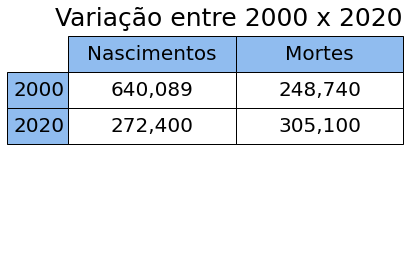

In [26]:
#Exibindo tabela de comparação de nascimentos e mortes entre 2000 e 2020
val1 = ['Nascimentos', 'Mortes']
val2 = ['2000','2020']
val3 = [['{:,}'.format(years['live_birth'].loc['2000']), '{:,}'.format(years['death'].loc['2000'])],
       ['{:,}'.format(years['live_birth'].loc['2020']), '{:,}'.format(years['death'].loc['2020'])]]

fig, ax = plt.subplots()
ax.set_axis_off() 
table = ax.table( 
    cellText = val3,  
    rowLabels = val2,  
    colLabels = val1, 
    rowColours =["#90bcef"] * 2,  
    colColours =["#90bcef"] * 2, 
    cellLoc ='center',  
    loc ='upper left')
table.set_fontsize(20)
table.scale(1, 3)
   
ax.set_title('Variação entre 2000 x 2020', 
             fontsize = 25) 
   
plt.show() 

Repare como no início do milênio o número de nascimentos era muito superior às mortes. Cerca de **257.33%** maior.
Em 2020 as mortes ultrapassaram seu número em 10.72%.

A partir de 2015 a curva de nascimentos caiu significativamente, enquanto as mortes aumentaram em ritmo constante.

In [ ]:
fig2 = make_subplots(rows=1, cols=2, subplot_titles=('No. de Nascimentos', 'Taxa de Fertilidade'))

fig2.add_trace(go.Scatter(x=years.index, y=list(years['live_birth']), 
                                    fill='tozeroy', line=dict(color='#90bcef', width=1),
                                    showlegend=False, name=''), row=1, col=1)


fig2.add_trace(go.Scatter(x=years.index, y=list(years['fertility_rate']),
                                    fill='tozeroy', line=dict(color='#90bcef', width=1),
                                    showlegend=False, name=''), row=1, col=2)

fig2.update_layout(title=dict(text="Nascimentos x Taxa de Fertilidade", x=0.5, font_size=24, pad=dict(b=60)),
                  width=1000, height=450, plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

<img src="https://github.com/cristiana-e/Korea_Death_Birth/blob/master/graphs/fig2.png?raw=true">

Observe como a *curva de nascimentos é muito semelhante a curva de fertilidade*. A queda a partir de 2015 se repete da mesma forma como acontece no gráfico de nascimentos. **Vamos anotar essa questão também!**.
Agora, vamos retornar à relação entre os divórcios e a expectativa de vida e ver o que os gráficos conseguem nos contar!

In [ ]:
#plotando o gráfico de comparação entre divórcios e expectativa de vida
fig3 = make_subplots(rows=1, cols=2, subplot_titles=('Divórcios', 'Expectativa de Vida'))

fig3.add_trace(go.Scatter(x=years.index, y=list(years['divorces']), 
                                    fill='tozeroy', line=dict(color='#778BD9', width=1),
                                    showlegend=False, name=''), row=1, col=1)


fig3.add_trace(go.Scatter(x=years.index, y=list(years['life_expectancy']),
                                    fill='tozeroy', line=dict(color='#778BD9', width=1),
                                    showlegend=False, name=''), row=1, col=2)

fig3.update_layout(title=dict(text="Divórcios x Expectativa de Vida", x=0.5, font_size=24, pad=dict(b=60)),
                  width=1000, height=450, plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

<img src="https://github.com/cristiana-e/Korea_Death_Birth/blob/master/graphs/fig3.png?raw=true">

### Nem todas as variáveis correlacionadas implicam em uma relação de causalidade

Pode ser este o caso. Os valores dos gráficos acima não se comportam de forma semelhante como o que acontece com os dados de natalidade e fertilidade. *Apesar de correlacionadas, divórcios e expectativa de vida não aparecem interferir significativamente uma na outra*. Entretanto, uma análise superficial como esta não pode comprovar se, de fato, há alguma relação entre o número de divórcios e a longevidade dos cidadãos sul coreanos. Para isso, **um estudo mais aprofundado precisa ser feito**.

In [ ]:
#plotando o gráfico de comparação entre divórcios, casamentos e taxa de fertilidade
fig4 = make_subplots(rows=1, cols=2)

fig4.add_trace(go.Scatter(x=years.index, y=list(years['divorces']), line=dict(color='#F59493', width=3),
                                    showlegend=True, name='Divórcios'), row=1, col=1)

fig4.add_trace(go.Scatter(x=years.index, y=list(years['fertility_rate'])
                                    , line=dict(color='#7488D4', width=3),
                                    showlegend=True, name='Taxa de Fertilidade'), row=1, col=2)

fig4.add_trace(go.Scatter(x=years.index, y=list(years['marriages'])
                                    , line=dict(color='#7194BD', width=3),
                                    showlegend=True, name='Casamentos'), row=1, col=1)

fig4.update_layout(title=dict(text="Divórcios x Casamentos x Taxa de Fertilidade", x=0.5, font_size=24, pad=dict(b=50)),
                  width=1000, height=450, plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

<img src="https://github.com/cristiana-e/Korea_Death_Birth/blob/master/graphs/fig4.png?raw=true">

## Conclusões

Com esta análise, por mais superficial que seja, é possível identificar alguns pontos que chamam atenção. Alguns dos *outliers* identificados podem apontar situações importantes a serem pensadas pelo governo sul coreano. Vamos falar indivialmente de cada informação que conseguimos extrair deste dataset.

### Número de mortes acima do padrão

Apesar do que falamos anteriormente sobre a pandemia ter afetado o número de mortes no país, podemos perceber uma <span style="background-color: #FF5C5C">elevação constante desses números desde 2001</span>. A pandemia pode ter adiantado em aproximadamente 2 anos a ocorrência desses valores, mas, pelo o que os gráficos apontaram, o aumento das mortes é algo presente desde o início do milênio.

### Declínio dos nascimentos

O que mais chama a atenção nestes dados é a <span style="background-color: #FF5C5C">queda acentuada que teve início em 2015</span>. Percebemos *um declínio muito parecido na taxa de fertilidade das mulheres*.

### Casamentos e divórcios

O número de casamentos também apresentou uma queda significativa. Por mais que os números tenham se recuperado após a queda entre 2007 e 2009, os <span style="background-color: #FF5C5C">casamentos começaram a cair abruptamente a partir de 2011</spam> . Os divórcios, por sua vez, apresentaram um grande pico em 2003, mas os números mantiveram uma queda constante a partir de então.

As perguntas que surgem com esses dados são:

   - O que faz as mulheres decidirem não ter filhos? E por que ano de 2015 possa ter influenciado nessa decisão das mulheres?
   - Da mesma forma, quais fatores estão levando os sul coreanos a não se casar?
   - O que está ocasionando o constante aumento das mortes na população?
    
Certamente o governo sul coreano está trabalhando nessas questões na melhor forma possível. Os números são alarmantes e, se nada for feito, uma população conservadora com seu "sangue" como a sul coreana pode enfrentar graves consequências num, futuro próximo.

##### Este *dataset* é uma versão resumida disponibilizada no site do [Kosis]('https://kosis.kr/eng/index/index.do'), ideal apenas para uma abordagem inicial. As perguntas levantadas sugerem futuras análises, que dependerão da disponibilização desses dados.